In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
import sklearn.metrics as sm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import seaborn as sb
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [2]:
df = pd.read_csv("../data/hypertension_data.csv")
df = df.drop_duplicates()
print(df.head())

    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0  57.0  1.0   3       145   233    1        0      150      0      2.3   
1  64.0  0.0   2       130   250    0        1      187      0      3.5   
2  52.0  1.0   1       130   204    0        0      172      0      1.4   
3  56.0  0.0   1       120   236    0        1      178      0      0.8   
4  66.0  0.0   0       120   354    0        1      163      1      0.6   

   slope  ca  thal  target  
0      0   0     1       1  
1      0   0     2       1  
2      2   0     2       1  
3      2   0     2       1  
4      2   0     2       1  


In [3]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,26083.000000,26058.00000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000,26083.000000
mean,55.661389,0.50000,0.958594,131.592992,246.246061,0.149753,0.526512,149.655024,0.326573,1.039512,1.400299,0.721849,2.318752,0.547253
std,15.189768,0.50001,1.023931,17.588809,51.643522,0.356836,0.525641,22.858109,0.468969,1.165138,0.616513,1.011608,0.604659,0.497772
min,11.000000,0.00000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,44.000000,0.00000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,0.50000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,67.000000,1.00000,2.000000,140.000000,275.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,98.000000,1.00000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
df_features = list(df.columns)
print(df_features)

['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']


In [5]:
print((df[df_features]==0).sum())
print((df[df_features]=="NaN").sum())

age             0
sex         13029
cp          12314
trestbps        0
chol            0
fbs         22177
restecg     12702
thalach         0
exang       17565
oldpeak      8592
slope        1826
ca          15146
thal          154
target      11809
dtype: int64
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [6]:
#print((df[X.columns]).isNull().sum())
print(df[df_features].isnull().sum())
print(df.shape)
df = df.dropna(axis = 0)
print(df.shape)
#print(X)

age          0
sex         25
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
target       0
dtype: int64
(26083, 14)
(26058, 14)


In [7]:
print((df[df_features]==0).sum())

age             0
sex         13029
cp          12314
trestbps        0
chol            0
fbs         22152
restecg     12702
thalach         0
exang       17540
oldpeak      8592
slope        1826
ca          15146
thal          154
target      11784
dtype: int64


In [8]:
print(df.max())

age          98.0
sex           1.0
cp            3.0
trestbps    200.0
chol        564.0
fbs           1.0
restecg       2.0
thalach     202.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64


In [9]:
print(df.min())

age          11.0
sex           0.0
cp            0.0
trestbps     94.0
chol        126.0
fbs           0.0
restecg       0.0
thalach      71.0
exang         0.0
oldpeak       0.0
slope         0.0
ca            0.0
thal          0.0
target        0.0
dtype: float64


In [10]:
print(df.max() - df.min())

age          87.0
sex           1.0
cp            3.0
trestbps    106.0
chol        438.0
fbs           1.0
restecg       2.0
thalach     131.0
exang         1.0
oldpeak       6.2
slope         2.0
ca            4.0
thal          3.0
target        1.0
dtype: float64


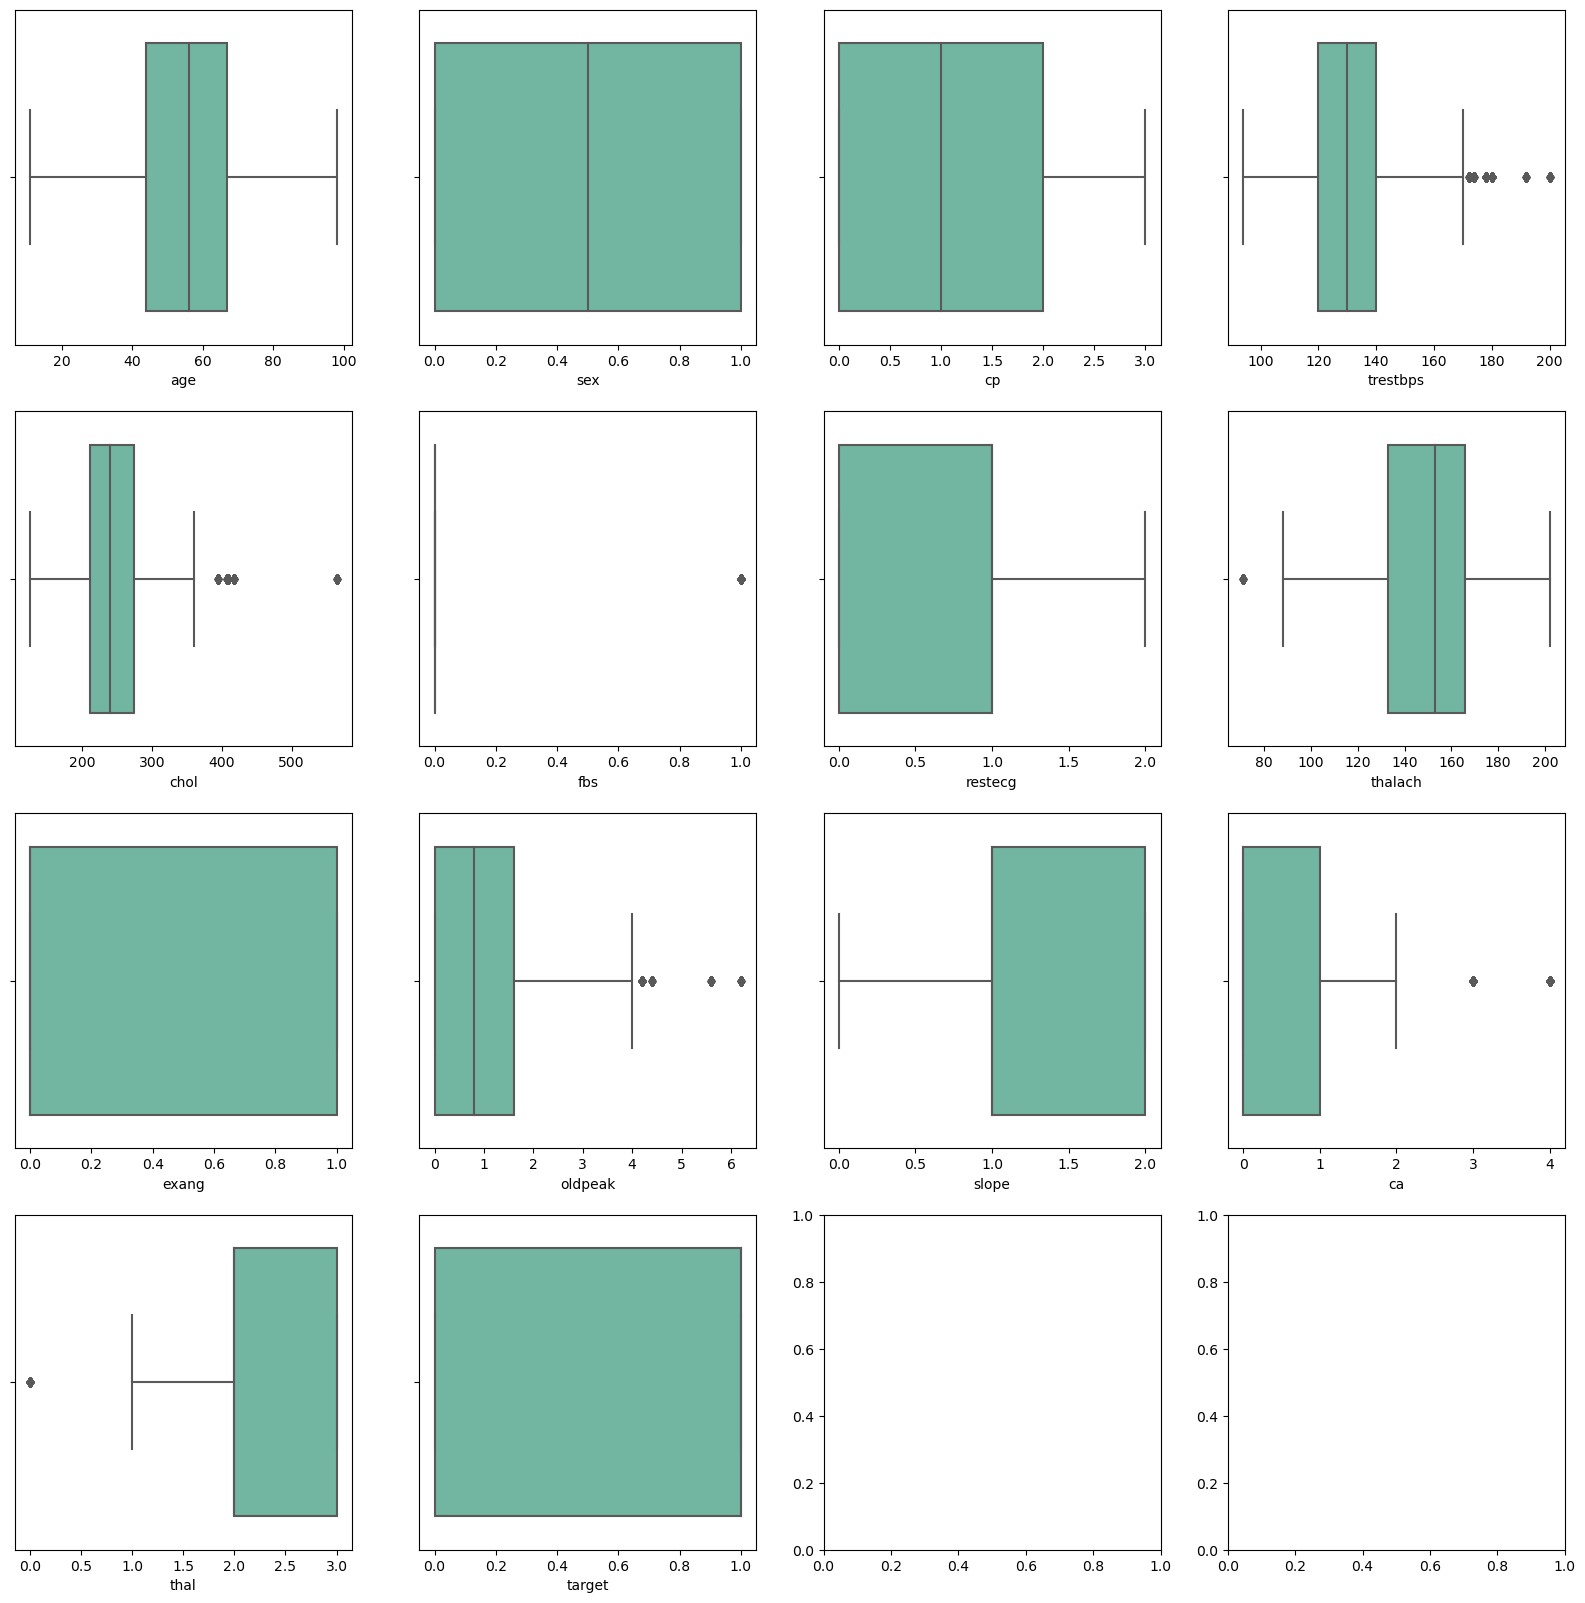

In [12]:
fig, axes = plt.subplots(4,4, figsize=(20,20))
x_,y_ = 0,0
for i, column in enumerate(df.columns[:]):    
    sb.boxplot(x=df[column], ax=axes[x_,y_], palette="Set2")
    if i < 3:
        y_ += 1
    elif i == 3: 
        x_ = 1
        y_ = 0
    elif i == 7: 
        x_ = 2
        y_ = 0
    elif i == 11: 
        x_ = 3
        y_ = 0
    else:
        y_ += 1

In [13]:
cols = df.columns
print(cols)
scaler = MinMaxScaler()
dat = scaler.fit_transform(df)
df_01 = pd.DataFrame(data=dat, columns=cols)  
print(df_01.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.528736  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.609195  0.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.471264  1.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.517241  0.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.632184  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333     1.0  
1  0.564516    0.0  0.0  0.666667     1.0  
2  0.225806    1.0  0.0  0.666667     1.0  
3  0.129032    1.0  0.0  0.666667     1.0  
4  0.096774    1.0  0.0  0.666667     1.0  


In [14]:
print(df_01.max() - df_01.min())

age         1.0
sex         1.0
cp          1.0
trestbps    1.0
chol        1.0
fbs         1.0
restecg     1.0
thalach     1.0
exang       1.0
oldpeak     1.0
slope       1.0
ca          1.0
thal        1.0
target      1.0
dtype: float64


In [15]:
x = df_01.drop(["target"], axis =1);
y = df_01["target"]
print(y.value_counts())

1.0    14274
0.0    11784
Name: target, dtype: int64


(array([11784.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 14274.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

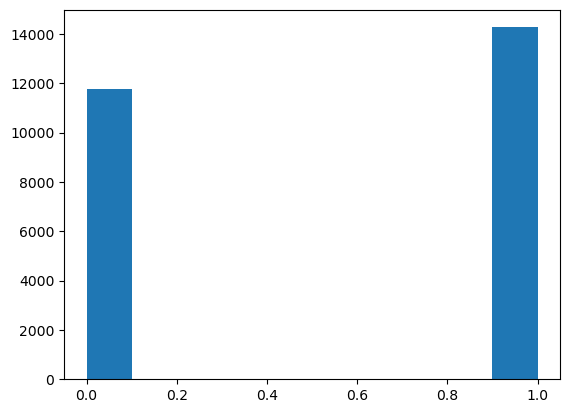

In [16]:
plt.hist(y)

1.0    13093
0.0    11784
Name: target, dtype: int64


(array([11784.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13093.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

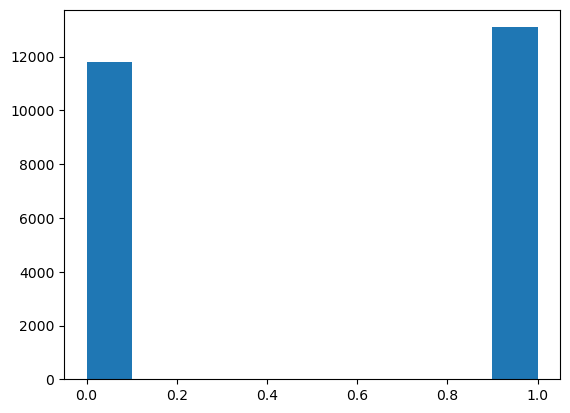

In [17]:
# transform the dataset
under = RandomUnderSampler(sampling_strategy= 0.9, random_state=0)
X, Y = under.fit_resample(x, y)
print(Y.value_counts())
plt.hist(Y)

0.0    13093
1.0    13093
Name: target, dtype: int64


(array([13093.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 13093.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

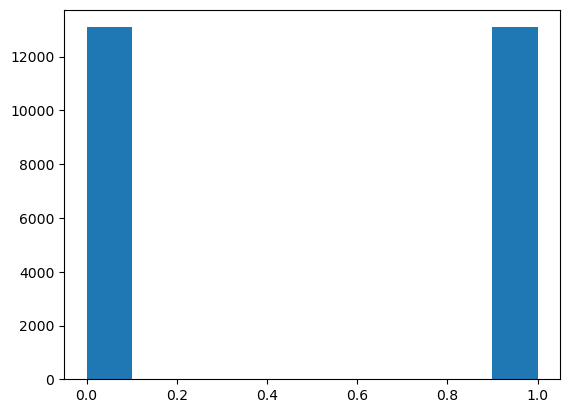

In [18]:
smt = SMOTE(random_state=0)
X, Y = smt.fit_resample(X,Y)
print(Y.value_counts())
plt.hist(Y)

In [20]:
# creating a decision tree classifier
dt_model = tree.DecisionTreeClassifier()
param_grid_dt = {
     
}
cv_array = [2,3,4,5]
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=dt_model, param_grid=param_grid_dt, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  3
Parameters :  {}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  4
Parameters :  {}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  5
Parameters :  {}
Accuracy :  100.000
Standed deviation :  0.000


In [21]:
# creating a Gradient boosting classifier
gb_model = GradientBoostingClassifier()
param_grid_gb = {
     'random_state': [0, 1, 2,3,4,5 , 10, 20, 30, 40, 50]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'random_state': 0}
Accuracy :  97.617
Standed deviation :  0.298
CV value :  3
Parameters :  {'random_state': 0}
Accuracy :  97.552
Standed deviation :  0.544
CV value :  4
Parameters :  {'random_state': 0}
Accuracy :  98.129
Standed deviation :  0.372
CV value :  5
Parameters :  {'random_state': 0}
Accuracy :  98.243
Standed deviation :  0.375


In [22]:
# creating a KNN classifier
KNN_model =KNeighborsClassifier()
param_grid_knn = {
     'n_neighbors': [3, 5, 7, 11, 13, 17]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=KNN_model, param_grid=param_grid_knn, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'n_neighbors': 3}
Accuracy :  99.973
Standed deviation :  0.004
CV value :  3
Parameters :  {'n_neighbors': 3}
Accuracy :  99.981
Standed deviation :  0.014
CV value :  4
Parameters :  {'n_neighbors': 3}
Accuracy :  99.989
Standed deviation :  0.007
CV value :  5
Parameters :  {'n_neighbors': 3}
Accuracy :  99.996
Standed deviation :  0.008


In [23]:
# creating a Lgistic regression classifier
lr_model = LogisticRegression() 

param_grid_lr = {
     'max_iter': [100, 200, 300, 400, 500]
}
for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=lr_model, param_grid=param_grid_lr, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'max_iter': 100}
Accuracy :  84.198
Standed deviation :  0.153
CV value :  3
Parameters :  {'max_iter': 100}
Accuracy :  83.281
Standed deviation :  0.608
CV value :  4
Parameters :  {'max_iter': 100}
Accuracy :  83.865
Standed deviation :  0.179
CV value :  5
Parameters :  {'max_iter': 100}
Accuracy :  83.823
Standed deviation :  0.413


In [24]:
# creating a Nave Bayers classifier
nb_model = MultinomialNB()
param_grid_nb = {

}
for cv in cv_array:
    gridSearchRF = GridSearchCV(estimator=nb_model, param_grid=param_grid_nb, scoring='accuracy', n_jobs=-1, cv=cv)
    gridSearchRF.fit(X, Y)
    print("CV value : ", cv)
    print("Parameters : ", gridSearchRF.best_params_)
    print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
    print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {}
Accuracy :  79.271
Standed deviation :  0.023
CV value :  3
Parameters :  {}
Accuracy :  79.126
Standed deviation :  0.081
CV value :  4
Parameters :  {}
Accuracy :  79.008
Standed deviation :  0.296
CV value :  5
Parameters :  {}
Accuracy :  79.000
Standed deviation :  0.463


In [25]:
# creating a SVM classifier
svm_model = svm.SVC()
param_grid_svm = {
     'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))


CV value :  2
Parameters :  {'kernel': 'poly'}
Accuracy :  95.104
Standed deviation :  0.130
CV value :  3
Parameters :  {'kernel': 'poly'}
Accuracy :  95.639
Standed deviation :  0.066
CV value :  4
Parameters :  {'kernel': 'poly'}
Accuracy :  95.673
Standed deviation :  0.099
CV value :  5
Parameters :  {'kernel': 'poly'}
Accuracy :  95.719
Standed deviation :  0.157


In [26]:
# creating a Random forest classifier
rf = RandomForestClassifier()
param_grid_rf = {
     'max_depth': [80, 90, 100, 110, 150, 200, 300],
     'max_features': [2, 3, 4, 5,6],
     'n_estimators': [100, 200, 300]
}

for cv in cv_array:
     gridSearchRF = GridSearchCV(estimator=rf, param_grid=param_grid_rf, scoring='accuracy', n_jobs=-1, cv=cv)
     gridSearchRF.fit(X, Y)
     print("CV value : ", cv)
     print("Parameters : ", gridSearchRF.best_params_)
     print("Accuracy :  %0.3f" % (gridSearchRF.best_score_*100))
     print("Standed deviation :  %0.3f" % (gridSearchRF.cv_results_['std_test_score'][gridSearchRF.best_index_]*100))

CV value :  2
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  3
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  4
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  100.000
Standed deviation :  0.000
CV value :  5
Parameters :  {'max_depth': 80, 'max_features': 2, 'n_estimators': 100}
Accuracy :  100.000
Standed deviation :  0.000
